In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
import xgboost as xgb
warnings.filterwarnings('ignore')



In [11]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.3.4
1.20.3
0.11.2


In [12]:
data = pd.read_csv('Vascular_dataset.csv',delimiter=';')

In [13]:
data


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Independent Features:

Age (in days), Gender (1-Female, 2-Male), Height, Weight, Systolic BP, Diastolic BP,

Cholesterol - 1 normal, 2 above normal, 3 well above normal

Glucose - 1 normal, 2 above normal, 3 well above normal

Smoking, Alcohol intake, Physical activity

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Dependent/Output Feature:

Cardiovascular Disease


In [15]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Average age of people is 53.

Percentage of male is 35.

Percentage of smoker is 9.

Percentage of alcoholic is 5.

Percentage of active people is 80.

We can see that there are various outliers in 'ap_hi' and 'ap_lo' columns since the standard deviation value is too high. We can also see that the maximum and minimum values in these two columns are too high and negative respectively which is not possible for any Blood Pressure value.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


There are no missing values in the data.

We can see that there are various outliers in 'ap_hi' and 'ap_lo' columns since the standard deviation value is too high. We can also see that the maximum and minimum values in these two columns are too high and negative respectively which is not possible for any Blood Pressure value.

In [17]:
data.drop('id',axis=1,inplace=True)

In [18]:
data['age'] = (data['age']//365)

In [19]:

data['gender'] = data['gender'] - 1

In [20]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,51,0,165,64.0,130,70,3,1,0,0,0,1
3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,47,0,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,1,168,76.0,120,80,1,1,1,0,1,0
69996,61,0,158,126.0,140,90,2,2,0,0,1,1
69997,52,1,183,105.0,180,90,3,1,0,1,0,1
69998,61,0,163,72.0,135,80,1,2,0,0,0,1


In [21]:
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029756,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


<AxesSubplot:>

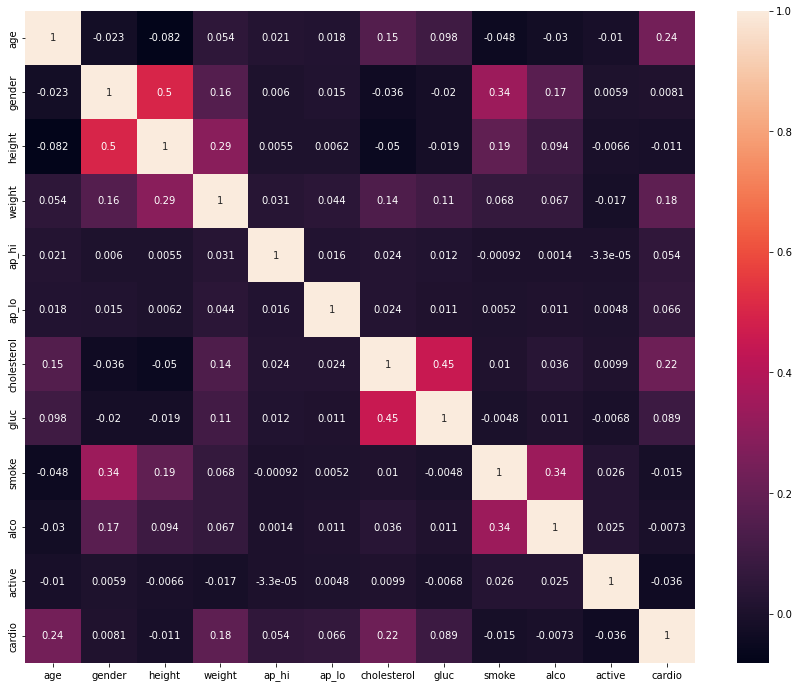

In [22]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)

In [23]:

data['cholesterol'] = data['cholesterol'].map({1:"chol_1",2:"chol_2",3:"chol_3"})

data['gluc'] = data['gluc'].map({1:"gluc_1",2:"gluc_2",3:"gluc_3"})

<AxesSubplot:xlabel='ap_hi'>

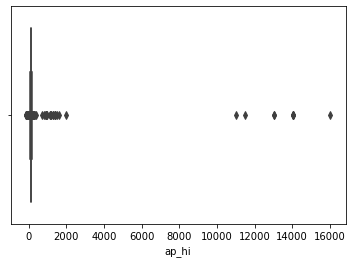

In [24]:
sns.boxplot(x=data['ap_hi'])

<AxesSubplot:xlabel='ap_lo'>

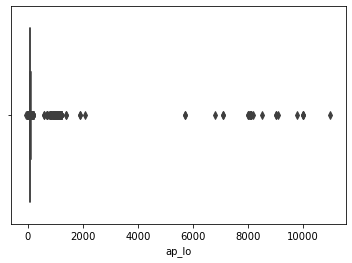

In [25]:
sns.boxplot(x=data['ap_lo'])

We are going to remove the outliers in ap_hi and ap_lo as these values are not measured correctly and can impact the performance of our model.

<AxesSubplot:xlabel='height'>

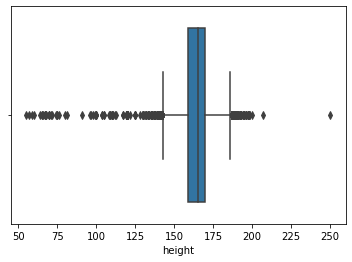

In [26]:

sns.boxplot(x=data['height'])

<AxesSubplot:xlabel='weight'>

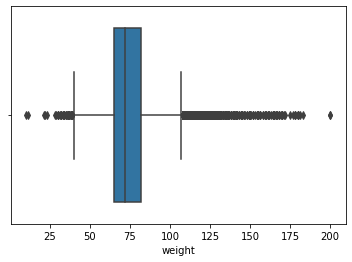

In [27]:

sns.boxplot(x=data['weight'])

<AxesSubplot:ylabel='Density'>

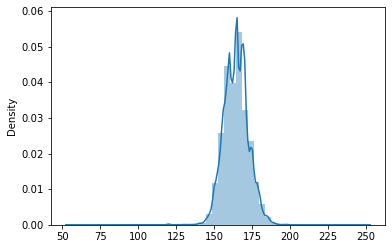

In [28]:

sns.distplot(x=data['height'])

<AxesSubplot:ylabel='Density'>

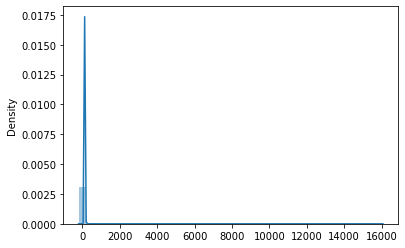

In [29]:
sns.distplot(x=data['ap_hi'])

<AxesSubplot:ylabel='Density'>

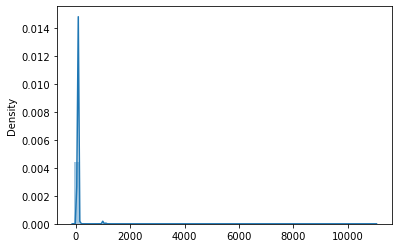

In [30]:
sns.distplot(x=data['ap_lo'])

<AxesSubplot:xlabel='cardio', ylabel='count'>

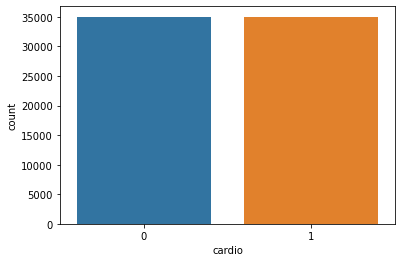

In [31]:
sns.countplot(x=data['cardio'])

This is a balanced dataset since the count of each of the output classes is same.

<AxesSubplot:xlabel='gluc', ylabel='count'>

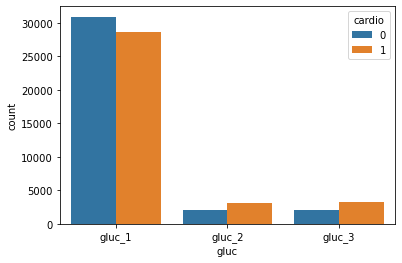

In [32]:
sns.countplot(x=data['gluc'],hue=data['cardio'])

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

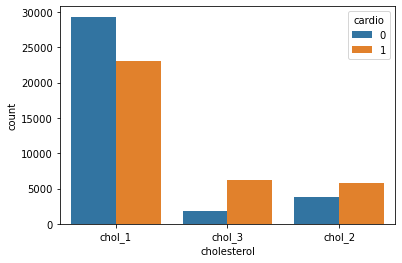

In [33]:
sns.countplot(x=data['cholesterol'],hue=data['cardio'])

We can see that as the levels of glucose and cholestrol are increases, the chances of having cardiovascular disease may increase.

<AxesSubplot:xlabel='active', ylabel='count'>

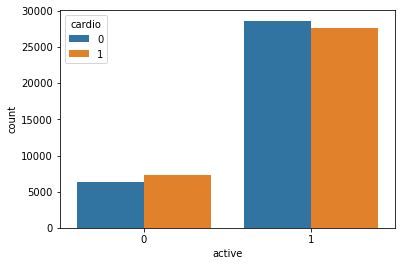

In [34]:
sns.countplot(x=data['active'],hue=data['cardio'])

<AxesSubplot:xlabel='gender', ylabel='count'>

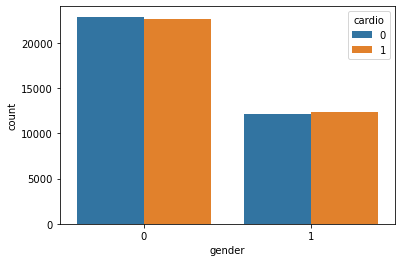

In [35]:
sns.countplot(x=data['gender'],hue=data['cardio'])

<AxesSubplot:xlabel='alco', ylabel='count'>

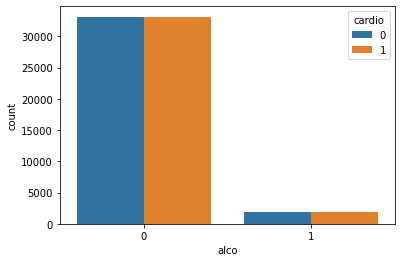

In [36]:
sns.countplot(x=data['alco'],hue=data['cardio'])

<AxesSubplot:xlabel='smoke', ylabel='count'>

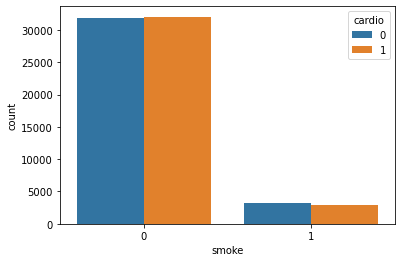

In [37]:
sns.countplot(x=data['smoke'],hue=data['cardio'])

In [38]:
def remove_outliers(arr):
    q1 = np.percentile(arr,25)
    q3 = np.percentile(arr,75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for i in range(0,len(arr)):
        if arr[i] >= upper_bound or arr[i] <= lower_bound:
            arr[i] = np.nan

In [39]:
remove_outliers(data['ap_hi'])
remove_outliers(data['ap_lo'])
remove_outliers(data['height'])
remove_outliers(data['weight'])

In [40]:
data


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168.0,62.0,110.0,80.0,chol_1,gluc_1,0,0,1,0
1,55,0,156.0,85.0,140.0,90.0,chol_3,gluc_1,0,0,1,1
2,51,0,165.0,64.0,130.0,70.0,chol_3,gluc_1,0,0,0,1
3,48,1,169.0,82.0,150.0,100.0,chol_1,gluc_1,0,0,1,1
4,47,0,156.0,56.0,100.0,NaN,chol_1,gluc_1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,1,168.0,76.0,120.0,80.0,chol_1,gluc_1,1,0,1,0
69996,61,0,158.0,NaN,140.0,90.0,chol_2,gluc_2,0,0,1,1
69997,52,1,183.0,105.0,NaN,90.0,chol_3,gluc_1,0,1,0,1
69998,61,0,163.0,72.0,135.0,80.0,chol_1,gluc_2,0,0,0,1


In [41]:
data = data.dropna()

dropping the outliers from data

In [42]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168.0,62.0,110.0,80.0,chol_1,gluc_1,0,0,1,0
1,55,0,156.0,85.0,140.0,90.0,chol_3,gluc_1,0,0,1,1
2,51,0,165.0,64.0,130.0,70.0,chol_3,gluc_1,0,0,0,1
3,48,1,169.0,82.0,150.0,100.0,chol_1,gluc_1,0,0,1,1
5,60,0,151.0,67.0,120.0,80.0,chol_2,gluc_2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,0,172.0,70.0,130.0,90.0,chol_1,gluc_1,0,0,1,1
69994,57,0,165.0,80.0,150.0,80.0,chol_1,gluc_1,0,0,1,1
69995,52,1,168.0,76.0,120.0,80.0,chol_1,gluc_1,1,0,1,0
69998,61,0,163.0,72.0,135.0,80.0,chol_1,gluc_2,0,0,0,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61774 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          61774 non-null  int64  
 1   gender       61774 non-null  int64  
 2   height       61774 non-null  float64
 3   weight       61774 non-null  float64
 4   ap_hi        61774 non-null  float64
 5   ap_lo        61774 non-null  float64
 6   cholesterol  61774 non-null  object 
 7   gluc         61774 non-null  object 
 8   smoke        61774 non-null  int64  
 9   alco         61774 non-null  int64  
 10  active       61774 non-null  int64  
 11  cardio       61774 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.1+ MB


In [44]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000
mean,52.899197,0.348836,164.421634,73.158325,126.181727,81.650921,0.086428,0.052012,0.804319,0.491841
std,6.740961,0.476606,7.526350,12.247123,13.692507,7.566292,0.280997,0.222053,0.396727,0.499937
min,29.000000,0.000000,143.000000,40.000000,95.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,1.000000,170.000000,81.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,1.000000,186.000000,107.000000,169.000000,104.000000,1.000000,1.000000,1.000000,1.000000


In [45]:

Chol = pd.get_dummies(data['cholesterol'])
Gluc = pd.get_dummies(data['gluc'])

data = pd.concat([data,Chol,Gluc],axis=1)

In [46]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3
0,50,1,168.0,62.0,110.0,80.0,chol_1,gluc_1,0,0,1,0,1,0,0,1,0,0
1,55,0,156.0,85.0,140.0,90.0,chol_3,gluc_1,0,0,1,1,0,0,1,1,0,0
2,51,0,165.0,64.0,130.0,70.0,chol_3,gluc_1,0,0,0,1,0,0,1,1,0,0
3,48,1,169.0,82.0,150.0,100.0,chol_1,gluc_1,0,0,1,1,1,0,0,1,0,0
5,60,0,151.0,67.0,120.0,80.0,chol_2,gluc_2,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,0,172.0,70.0,130.0,90.0,chol_1,gluc_1,0,0,1,1,1,0,0,1,0,0
69994,57,0,165.0,80.0,150.0,80.0,chol_1,gluc_1,0,0,1,1,1,0,0,1,0,0
69995,52,1,168.0,76.0,120.0,80.0,chol_1,gluc_1,1,0,1,0,1,0,0,1,0,0
69998,61,0,163.0,72.0,135.0,80.0,chol_1,gluc_2,0,0,0,1,1,0,0,0,1,0


In [47]:

data.corr()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3
age,1.000000,-0.032514,-0.095207,0.054858,0.201910,0.144041,-0.048439,-0.028758,-0.011183,0.234739,-0.129028,0.021964,0.151730,-0.085446,0.023705,0.091202
gender,-0.032514,1.000000,0.516486,0.157767,0.038874,0.044120,0.336949,0.168135,0.007254,-0.006025,0.042535,-0.020607,-0.035764,0.022462,-0.005981,-0.024218
height,-0.095207,0.516486,1.000000,0.305845,-0.013329,0.004426,0.191682,0.093786,-0.009240,-0.028703,0.066785,-0.031868,-0.056673,0.030239,-0.019949,-0.021099
weight,0.054858,0.157767,0.305845,1.000000,0.229290,0.209763,0.064031,0.063671,-0.013099,0.159480,-0.122017,0.063008,0.098440,-0.098162,0.080550,0.053224
ap_hi,0.201910,0.038874,-0.013329,0.229290,1.000000,0.704027,0.020540,0.026020,0.003349,0.430715,-0.188817,0.099719,0.149970,-0.091604,0.067016,0.057551
ap_lo,0.144041,0.044120,0.004426,0.209763,0.704027,1.000000,0.019079,0.030530,0.000520,0.331652,-0.151091,0.078563,0.121320,-0.071970,0.057301,0.040721
smoke,-0.048439,0.336949,0.191682,0.064031,0.020540,0.019079,1.000000,0.342285,0.026972,-0.022579,-0.013180,0.023104,-0.006748,0.003430,0.012692,-0.016853
alco,-0.028758,0.168135,0.093786,0.063671,0.026020,0.030530,0.342285,1.000000,0.026411,-0.013166,-0.037952,0.038293,0.010681,-0.012886,0.025635,-0.007575
active,-0.011183,0.007254,-0.009240,-0.013099,0.003349,0.000520,0.026972,0.026411,1.000000,-0.037841,-0.005487,-0.006061,0.013913,0.009234,-0.011020,-0.001679
cardio,0.234739,-0.006025,-0.028703,0.159480,0.430715,0.331652,-0.022579,-0.013166,-0.037841,1.000000,-0.201848,0.077895,0.190935,-0.086230,0.047287,0.069449


<AxesSubplot:>

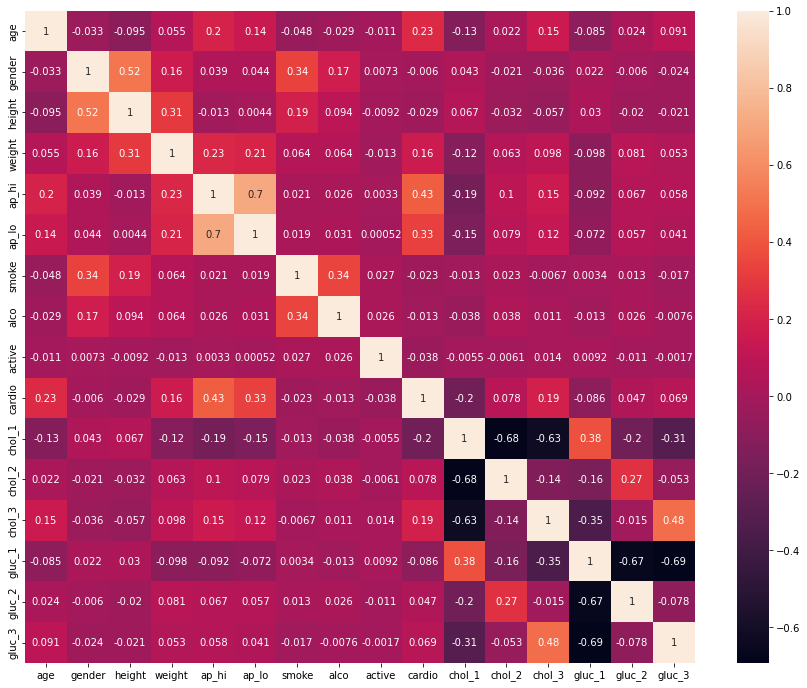

In [48]:

plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)

In [49]:
data.drop(['cholesterol','gluc','chol_1','gluc_1'],axis=1,inplace=True)

In [50]:
data


,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,chol_2,chol_3,gluc_2,gluc_3
0,50,1,168.0,62.0,110.0,80.0,0,0,1,0,0,0,0,0
1,55,0,156.0,85.0,140.0,90.0,0,0,1,1,0,1,0,0
2,51,0,165.0,64.0,130.0,70.0,0,0,0,1,0,1,0,0
3,48,1,169.0,82.0,150.0,100.0,0,0,1,1,0,0,0,0
5,60,0,151.0,67.0,120.0,80.0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,0,172.0,70.0,130.0,90.0,0,0,1,1,0,0,0,0
69994,57,0,165.0,80.0,150.0,80.0,0,0,1,1,0,0,0,0
69995,52,1,168.0,76.0,120.0,80.0,1,0,1,0,0,0,0,0
69998,61,0,163.0,72.0,135.0,80.0,0,0,0,1,0,0,1,0


In [51]:
X = data.drop(['cardio'],axis = 1)
Y = data['cardio']

In [52]:
X

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,chol_2,chol_3,gluc_2,gluc_3
0,50,1,168.0,62.0,110.0,80.0,0,0,1,0,0,0,0
1,55,0,156.0,85.0,140.0,90.0,0,0,1,0,1,0,0
2,51,0,165.0,64.0,130.0,70.0,0,0,0,0,1,0,0
3,48,1,169.0,82.0,150.0,100.0,0,0,1,0,0,0,0
5,60,0,151.0,67.0,120.0,80.0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,0,172.0,70.0,130.0,90.0,0,0,1,0,0,0,0
69994,57,0,165.0,80.0,150.0,80.0,0,0,1,0,0,0,0
69995,52,1,168.0,76.0,120.0,80.0,1,0,1,0,0,0,0
69998,61,0,163.0,72.0,135.0,80.0,0,0,0,0,0,1,0


In [53]:
Y

0        0
1        1
2        1
3        1
5        0
        ..
69993    1
69994    1
69995    0
69998    1
69999    0
Name: cardio, Length: 61774, dtype: int64

In [54]:
X.shape

(61774, 13)

In [55]:
Y.shape

(61774,)

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [57]:
X_train

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,chol_2,chol_3,gluc_2,gluc_3
67849,57,0,165.0,60.0,120.0,80.0,0,0,1,0,0,0,0
15577,51,0,163.0,60.0,115.0,70.0,0,0,0,0,0,0,0
65931,51,0,169.0,78.0,110.0,80.0,0,0,0,0,1,0,1
31137,40,0,164.0,88.0,130.0,90.0,0,0,1,0,0,0,0
18821,45,0,165.0,66.0,120.0,80.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52006,57,0,160.0,61.0,140.0,80.0,0,0,0,1,0,1,0
59391,50,0,157.0,71.0,130.0,80.0,0,0,0,0,1,0,1
48292,57,0,161.0,101.0,130.0,90.0,0,0,1,0,0,0,0
49381,42,0,168.0,74.0,120.0,80.0,0,0,1,0,0,0,0


In [58]:
X_test

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,chol_2,chol_3,gluc_2,gluc_3
67575,50,0,163.0,55.0,130.0,80.0,0,0,0,0,0,0,0
19822,47,0,159.0,69.0,160.0,90.0,0,0,1,0,1,0,0
41308,55,1,165.0,65.0,120.0,80.0,1,0,1,0,0,0,0
50464,57,0,159.0,69.0,110.0,70.0,1,0,1,0,1,0,0
54417,50,1,174.0,90.0,110.0,70.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26674,60,1,165.0,60.0,120.0,80.0,0,0,1,0,1,0,1
26075,49,1,168.0,88.0,140.0,95.0,0,0,1,0,0,0,0
55926,53,0,160.0,87.0,140.0,100.0,0,0,1,0,0,0,0
9822,61,1,167.0,73.0,130.0,90.0,0,0,1,0,1,0,0


In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# MODEL TRAINING AND TESTING

We are going to train and test our data on 5 model and compare the results

1. Logistic Regression Classifier
2. Random Forest Classifier
3. XGBoost

In [61]:
from sklearn.metrics import confusion_matrix, plot_roc_curve, classification_report

#1. LOGISTIC REGRESSION CLASSIFIER

In [62]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train,Y_train)

LogisticRegression()

In [63]:
Y_predi = classifier_lr.predict(X_test)

In [64]:
cm = confusion_matrix(Y_test,Y_predi)

<AxesSubplot:>

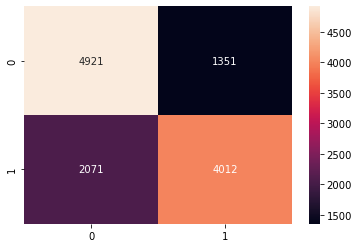

In [65]:
sns.heatmap(cm,annot = True, fmt ='0g')

Accuracy = 72.30%

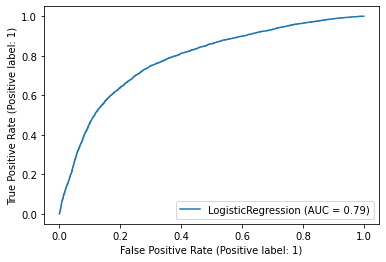

In [66]:
plot_roc_curve(classifier_lr,X_test,Y_test)

In [67]:
print(classification_report(Y_test,Y_predi))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6272
           1       0.75      0.66      0.70      6083

    accuracy                           0.72     12355
   macro avg       0.73      0.72      0.72     12355
weighted avg       0.73      0.72      0.72     12355



2. RANDOM FOREST CLASSIFIER


In [68]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train,Y_train)

RandomForestClassifier()

In [69]:
Y_predi = classifier_rf.predict(X_test)


In [70]:
cm = confusion_matrix(Y_test,Y_predi)

<AxesSubplot:>

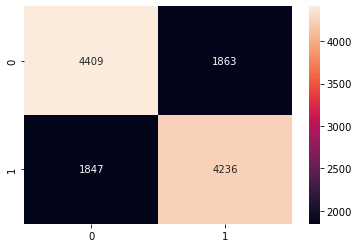

In [71]:
sns.heatmap(cm,annot = True, fmt = "0g")

Accuracy = 69.83%

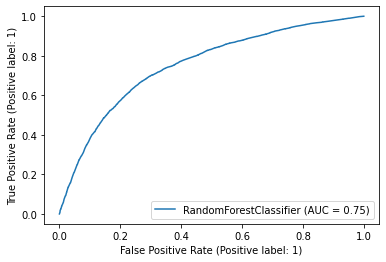

In [72]:
plot_roc_curve(classifier_rf,X_test,Y_test)

In [73]:
print(classification_report(Y_test,Y_predi))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      6272
           1       0.69      0.70      0.70      6083

    accuracy                           0.70     12355
   macro avg       0.70      0.70      0.70     12355
weighted avg       0.70      0.70      0.70     12355



3. XGBOOST CLASSIFIER

In [74]:
#import the xgboost from below cmd i

from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [75]:

Y_predi = classifier_xgb.predict(X_test)

<AxesSubplot:>

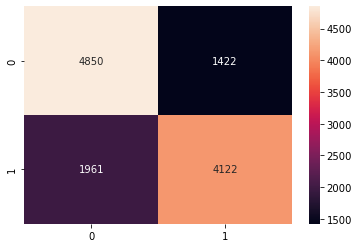

In [76]:
cm = confusion_matrix(Y_test,Y_predi)
sns.heatmap(cm,annot=True,fmt='0g')

Accuracy = 72.80%

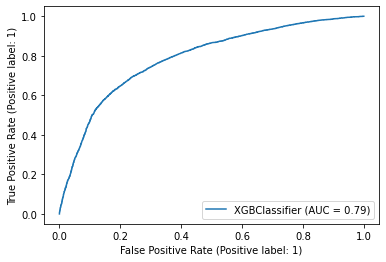

In [77]:
plot_roc_curve(classifier_xgb, X_test, Y_test)

In [78]:

print(classification_report(Y_test, Y_predi))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6272
           1       0.74      0.68      0.71      6083

    accuracy                           0.73     12355
   macro avg       0.73      0.73      0.73     12355
weighted avg       0.73      0.73      0.73     12355



Comparsion Between the models

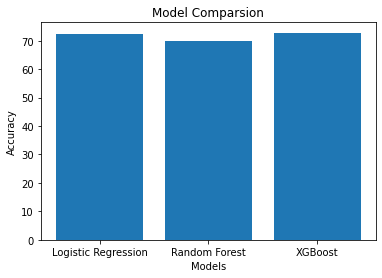

In [79]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Logistic Regression', 'Random Forest', 'XGBoost']
values = [72.30,69.83,72.80]

# Create bar plot
plt.bar(categories, values)

# Add title and labels
plt.title('Model Comparsion')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Show the plot
plt.show()


# The XGBoost model outperforms all the other models in terms of accuracy as well as class 1 recall. Thus, we will use XGBoost model for deployment.

In [89]:
pickle.dump(sc_X, open('C:/Users/shank/project/Vascular Vigilance/scaler.pkl','wb'))

In [90]:
import xgboost as xgb

classifier_xgb.save_model('C:/Users/shank/project/Vascular Vigilance/xgb_model.bin')
     